# Solar Forecasting Model Explanation
### Required Libraries

1. **fbprophet** - required to run the model and make predictions
2. **json** - to load the model in .json format
3. **numpy** - required for prophet model

### Inputs required
1. Directory in which model is stored


In [1]:
from fbprophet import Prophet
#import pickle
#import pandas as pd
import json
from fbprophet.serialize import model_to_json, model_from_json
import numpy as np

#full_data = pd.read_pickle('D:\\DataScience\\HooHacks\\fbprophet\\solardata.pkl')

with open('D:\\DataScience\\HooHacks\\fbprophet\\serialized_model.json', 'r') as fin:
    model = model_from_json(json.load(fin))  # Load model

Importing plotly failed. Interactive plots will not work.


### Predicting using loaded model
n is the number of hours forecast is required in the future. This can be 24 by default or can be taken as an input from the user.

Output variable: Forecast in dataframe format.
Columns:
1. ds - 15-min time stamp
2. yhat - solar output prediction in kW


In [2]:
n = 24 # number of hours in to future forecast is required
future = model.make_future_dataframe(periods=n, freq='H') 

future['cap'] = 120
future.cap = np.cbrt(future.cap)

forecast = model.predict(future)
forecast.yhat = forecast.yhat**3
forecast = forecast[['ds', 'yhat']]

***
### Plots for Verification (Not required for hosting on the cloud)

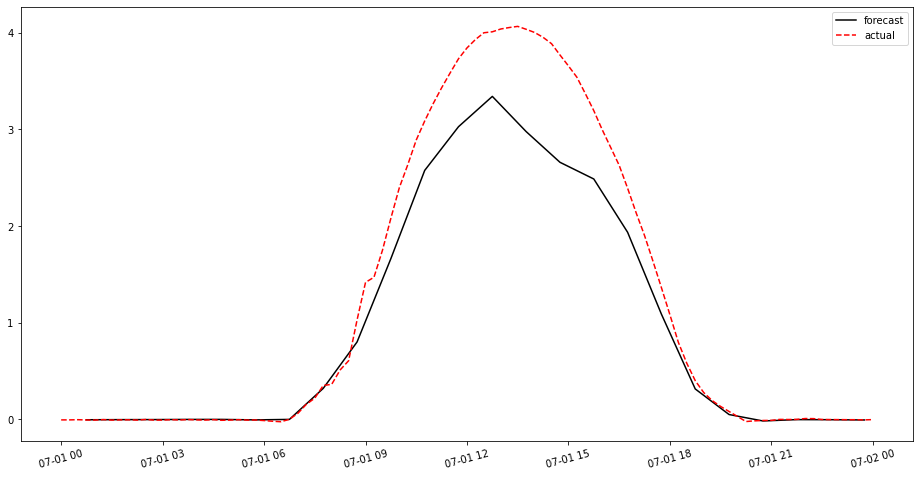

In [3]:
import pickle
import pandas as pd
full_data = pd.read_pickle('D:\\DataScience\\HooHacks\\fbprophet\\solardata.pkl')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.plot(forecast[forecast.ds.dt.month==7].ds, forecast[forecast.ds.dt.month==7].yhat, linestyle='-', color='black', label='forecast')
mask = (full_data.TIMESTAMP >= '2018-07-01') & (full_data.TIMESTAMP <= '2018-07-02')
ax.plot(full_data.loc[mask].TIMESTAMP, full_data.loc[mask].SOLAR, linestyle='--', color='red', label='actual')
#ax.plot(vars()['ID'+ str(names)]['local_15min'], vars()['ID'+ str(names)]['grid'], linestyle='--', color='red', label='usage')
plt.xticks(rotation=15)
#rate = txMaster[txMaster.txID == ID].rating.values[0]
#plt.title(str(names))
ax.legend()
plt.show()